In [148]:
import bifacial_radiance

In [149]:
simulationname = 'OmegaTestField'

In [150]:
testfolder = r'C:\Users\sarefeen\Documents\RadianceScenes\Temp'

In [151]:
TMYtoread = r'C:\Users\sarefeen\Documents\RadianceScenes\Temp\SRRL_WeatherFile_TMY3_60_2020.csv'

In [152]:
TMYtoread


'C:\\Users\\sarefeen\\Documents\\RadianceScenes\\Temp\\SRRL_WeatherFile_TMY3_60_2020.csv'

In [153]:
import pandas as pd
weatherfile = pd.read_csv(TMYtoread, header = 1)

In [154]:
weatherfile.head()

,Date (MM/DD/YYYY),Time (HH:MM),Wspd (m/s),Dry-bulb (C),DHI (W/m^2),DNI (W/m^2),GHI (W/m^2),Alb (unitless)
0,1/1/2020,01:00,5.467867,7.227683,0.000000,0.039632,0.0,0.0
1,1/1/2020,02:00,2.529017,6.917350,0.006899,0.000000,0.0,0.0
2,1/1/2020,03:00,3.874633,7.216600,0.000000,0.000000,0.0,0.0
3,1/1/2020,04:00,3.819000,7.436917,0.000000,0.000000,0.0,0.0
4,1/1/2020,05:00,4.129133,7.872650,0.000000,0.000000,0.0,0.0


In [22]:
wf2 = weatherfile[weatherfile['DNI (W/m^2)'] == weatherfile['DNI (W/m^2)'].max()]

In [144]:
wf3 = weatherfile[weatherfile['Date (MM/DD/YYYY)']== '4/29/2020']

In [145]:
y = wf3['DNI (W/m^2)']
x = wf3['Time (HH:MM)']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

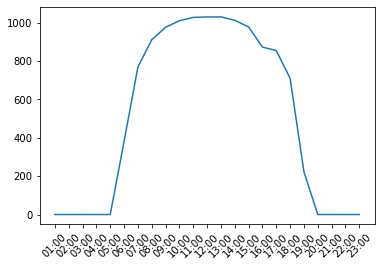

In [147]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xticks(rotation = 45)

In [71]:
wf2

,Date (MM/DD/YYYY),Time (HH:MM),Wspd (m/s),Dry-bulb (C),DHI (W/m^2),DNI (W/m^2),GHI (W/m^2),Alb (unitless)
1990,3/28/2020,13:00,5.982717,5.863217,80.602627,1064.340833,922.1741,0.183133


In [29]:
weatherfile.groupby('Date (MM/DD/YYYY)')['DNI (W/m^2)'].sum().max()

11781.073852

In [155]:
moduletype='Framed_Panel'
numpanels = 1  
x = 1  
y = 2
lat=39.742 # NREL SSRL location
lon=-105.179 # NREL SSRL location
elev=1829
timezone=-7
axis_tilt=0
axis_azimuth=180
limit_angle=60
backtrack=True 
gcr=0.35
angledelta=0.01
numpanels=1
torquetube=True
diameter = 0.130175        # 5 1/8 in
torqueTubeMaterial='Metal_Grey'
tubetype='Round'

# for torquetube, the simulation 
axisofrotationTorqueTube = False
hub_height = 1.35    # This is what we've been using but I measured 0.927 to torquetube...
xgap = 0.01    # 1 cm
zgap = 0.05    # 1 inch of arm, + 1 3/16 of panel width on average ~ 0.055 m
pitch=5.7      # distance between rows

# this is something I shall need to change to have better simulation resolution at the edge
sensorsy = 9

In [156]:
# TorqueTube Parameters
axisofrotationTorqueTube=False
torqueTube = True
cellLevelModule = False

In [157]:
albedo = 0.2  #'grass'     # ground albedo
# nMods = 20 
# nRows = 10 

#this change is for smalling the simulation

nMods = 1 
nRows = 1 

cumulativesky = False

In [158]:
demo = bifacial_radiance.RadianceObj(simulationname, path = testfolder)  # Create a RadianceObj 'object'

path = C:\Users\sarefeen\Documents\RadianceScenes\Temp


In [169]:
frameParams = {'frame_material' : 'Metal_Grey', 
               'frame_thickness' : 0.003,
               'frame_z' : 0.03,
               'nSides_frame' : 4,
               'frame_width' : 0.05}


omegaParams = {'omega_material': 'litesoil',
                'x_omega1' : 0.08,
                'mod_overlap' : 0.03,
                'y_omega' : 0.75,
                'x_omega3' : 0.02,
                'omega_thickness' : 0.01,
                'inverted' : False}
moduleDict=demo.makeModule(name=moduletype,x=x,y=y,numpanels = numpanels, xgap=xgap, zgap=zgap,
                            torquetube=torquetube, diameter=diameter, tubetype=tubetype, material=torqueTubeMaterial,
                            axisofrotationTorqueTube=axisofrotationTorqueTube, omegaParams = None, frameParams = None)


Module Name: Framed_Panel
Pre-existing .rad file objects\Framed_Panel.rad will be overwritten
Postion 1 Offsetfromaxis: 0
Module Framed_Panel updated in module.json


In [170]:
metdata = demo.readWeatherFile(TMYtoread)
demo.setGround() 
sceneDict = {'pitch': pitch,'hub_height':hub_height, 'nMods':nMods, 'nRows': nRows, 'sceney':y}  
trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, backtrack = backtrack, 
                            gcr = gcr, cumulativesky = cumulativesky)

start: 2020-01-01 01:00:00
end: 2020-12-30 23:00:00
Saving file EPWs\tmy3_temp.csv, # points: 8372
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


C:\Users\sarefeen\Anaconda3\lib\site-packages\pvlib\solarposition.py:448: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  unixtime = np.array(utcday.astype(np.int64)/10**9)


 Assigned Albedo from metdata.albedo
Loading albedo, 8372 value(s), 0.247 avg
4662 nonzero albedo values.


C:\Users\sarefeen\Anaconda3\lib\site-packages\pvlib\solarposition.py:368: FutureWarning: casting datetime64[ns, pytz.FixedOffset(-420)] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  unixtime = np.array(time.astype(np.int64)/10**9)


In [171]:
# Restricting run to one day for speed, 'MM_DD_HH'
startdate = '20_01_01_12'      
enddate = '20_01_01_12'
trackerdict = demo.gendaylit1axis(startdate = startdate, enddate = enddate) 
trackerdict = demo.makeScene1axis(moduletype = moduletype, sceneDict = sceneDict) 
trackerdict = demo.makeOct1axis()

# find the frontscan and backscan with the desired ystart value and then input them for function analysis1axis
#results = demo.analysis1axis(modWanted=16, rowWanted=3, sensorsy=sensorsy)

Creating ~0 skyfiles.  Takes 1-2 minutes
Created 1 skyfiles in /skies/

Making ~1 .rad files for gendaylit 1-axis workflow (this takes a minute..)
1 Radfiles created in /objects/

Making 1 octfiles in root directory.
Created 1axis_20_01_01_12_00.oct


In [173]:
demo.__dict__

{'metdata': <bifacial_radiance.main.MetObj at 0x24b454fcfa0>,
 'data': {},
 'path': 'C:\\Users\\sarefeen\\Documents\\RadianceScenes\\Temp',
 'name': '20_01_01_12_00',
 'materialfiles': ['materials\\ground.rad'],
 'skyfiles': ['skies\\sky2_39.742_-105.179_2020_01_01_12_00.rad'],
 'radfiles': [],
 'octfile': '1axis_20_01_01_12_00.oct',
 'Wm2Front': array([924.4227    , 924.523     , 924.6247    , 924.7264    ,
        924.8283    , 829.35757667, 809.57584333, 822.29544333,
        832.96334333]),
 'Wm2Back': array([247.4833    , 246.91586033, 246.26824467, 245.686622  ,
        132.78183467, 141.845628  , 144.30461467, 147.26458833,
        147.85806567]),
 'backRatio': array([0.35513476, 0.35508959, 0.35504413, 0.35499898, 0.19166731,
        0.22089821, 0.21882797, 0.21549653, 0.21195787]),
 'nMods': 1,
 'nRows': 1,
 'nowstr': '2021-08-17_103710',
 'basename': 'OmegaTestField',
 'moduleDict': {'x': 1,
  'y': 2,
  'z': 0.02,
  'modulematerial': 'black',
  'scenex': 1.01,
  'sceney': 2.0

In [174]:
demo.trackerdict['20_01_01_12_00']['surf_tilt']

16.9

In [172]:
scanpoints = int(0.05/0.005)     # sample 5 cm from the edge, with a resolution of 0.005 mm 
frame_thickness = 0.01
modscanBack = {}
for ii in range(0, 2):
    modscanBack['ystart']  = x/2.0 - (frame_thickness + 0.001) - 0.005*ii # (adding frame thicknes plus 1 mm so it does not overlay exactly) 
    result = demo.analysis1axis(modscanfront=modscanBack, modscanback=modscanBack, relative = False, customname='_WITHOUT_'+'pos_'+str(ii))


'''
irr_1axis_08_05_09_pos_0
irr_1axis_08_05_10_pos_0
irr_1axis_08_05_11_pos_0

irr_1axis_08_05_09_pos_1
irr_1axis_08_05_10_pos_1
irr_1axis_08_05_11_pos_1
irr_1axis_08_05_09_pos_2
irr_1axis_08_05_10_pos_2
irr_1axis_08_05_11_pos_2
'''

Linescan in process: 1axis_20_01_01_12_00_WITHOUT_pos_0_Front
Linescan in process: 1axis_20_01_01_12_00_WITHOUT_pos_0_Back
Saved: results\irr_1axis_20_01_01_12_00_WITHOUT_pos_0.csv
Index: 20_01_01_12_00. Wm2Front: 115.6273. Wm2Back: 20.09651259259259
Saving a cumulative-results file in the main simulation folder.This adds up by sensor location the irradiance over all hours or configurations considered.

Saving Cumulative results
Saved: cumulative_results__WITHOUT_pos_0.csv
Linescan in process: 1axis_20_01_01_12_00_WITHOUT_pos_1_Front
Linescan in process: 1axis_20_01_01_12_00_WITHOUT_pos_1_Back
Saved: results\irr_1axis_20_01_01_12_00_WITHOUT_pos_1.csv
Index: 20_01_01_12_00. Wm2Front: 106.16068999999999. Wm2Back: 29.792397407407407
Saving a cumulative-results file in the main simulation folder.This adds up by sensor location the irradiance over all hours or configurations considered.

Saving Cumulative results
Saved: cumulative_results__WITHOUT_pos_1.csv


'\nirr_1axis_08_05_09_pos_0\nirr_1axis_08_05_10_pos_0\nirr_1axis_08_05_11_pos_0\n\nirr_1axis_08_05_09_pos_1\nirr_1axis_08_05_10_pos_1\nirr_1axis_08_05_11_pos_1\nirr_1axis_08_05_09_pos_2\nirr_1axis_08_05_10_pos_2\nirr_1axis_08_05_11_pos_2\n'